In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import datetime
from pymystem3 import Mystem
import re
from nltk.corpus import stopwords
import nltk
import pickle
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect(r"../../diplom.db")
cur = conn.cursor()

In [3]:
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from ZAVTRA;""").fetchall()]
graph = [i[0] for text in corpus for i in nltk.bigrams(text) if i[1] == "демократия"]
c = Counter(graph)
adjusting = pd.DataFrame(c.most_common()).rename(columns={0: "Слово", 1: "Количество"})
adjusting["Часть"] = [i[1] for i in nltk.pos_tag(adjusting["Слово"], lang="rus")]
adj = adjusting[adjusting["Часть"].isin(["A=m", "A-PRO=m"])].reset_index(drop=True)
s = adj["Количество"].sum()
adj["Процент"] = round(adj["Количество"]/s*100, 2)

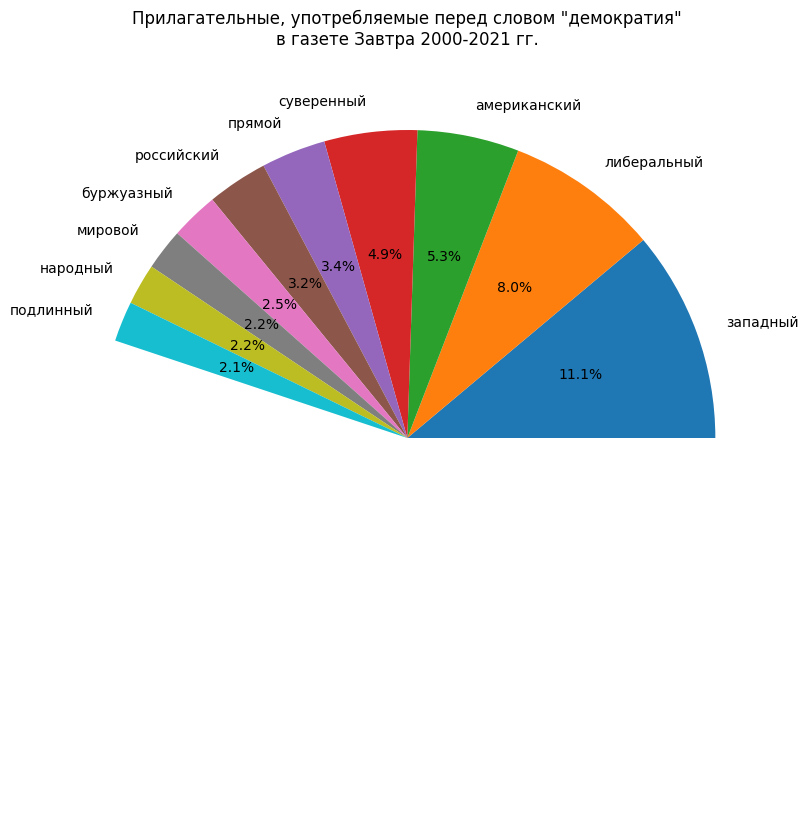

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True)
temp2 = adj[["Слово", "Процент"]].head(10)
temp2.loc[10, "Слово"] = "Ост."
temp2.loc[10, "Процент"] = adj.loc[10:, "Процент"].sum()
wedge, text, procent = ax.pie(temp2["Процент"], labels=temp2["Слово"], autopct='%1.1f%%')
wedge[10].set_visible(False)
text[10].set_visible(False)
procent[10].set_visible(False)
ax.set_title('Прилагательные, употребляемые перед словом "демократия"\nв газете Завтра 2000-2021 гг.')
fig.savefig("zavtra_adj.png")

In [5]:
%%time
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from ZAVTRA""").fetchall()]
model = Word2Vec(corpus, 
                 vector_size=1024,      # embedding vector size
                 min_count=2,
                 window=5).wv
model.save("zavtra.model")
model.most_similar('демократия')

CPU times: total: 57min 13s
Wall time: 43min 42s


[('демократический', 0.5375350117683411),
 ('парламентаризм', 0.5364339351654053),
 ('народовластие', 0.5331231951713562),
 ('авторитаризм', 0.5291890501976013),
 ('либерализм', 0.4982920289039612),
 ('диктатура', 0.4813978970050812),
 ('тирания', 0.47368478775024414),
 ('автократия', 0.46813255548477173),
 ('тоталитаризм', 0.46619951725006104),
 ('плюрализм', 0.459795206785202)]

In [5]:
conn.close()